# OSI-SAF ICE TYPE 投影

In [31]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from RSData import *
from HaiYangData import *

import matplotlib.pyplot as plt
import numpy as np
import glob


In [32]:
satellite = r'ocisaf'
sensor = r'icetype'
osi_i_t = HaiYangData(satellite=satellite, sensor=sensor,resolution=12500)

# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")



In [33]:
dir_path = r"H:\remote_sensing_data\sea_ice_type\osisaf"

files = glob.glob(dir_path + '\*.nc')

In [34]:
# 取出20200723做实验
files = files[641:642]

In [42]:
files

['H:\\remote_sensing_data\\sea_ice_type\\osisaf\\ice_type_nh_polstere-100_multi_202007211200.nc']

In [35]:
transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [36]:
value_array = np.empty(shape=(1120, 760,5))
grid_array = np.zeros((osi_i_t.nlat, osi_i_t.nlon))
grid_num_array = np.zeros((osi_i_t.nlat, osi_i_t.nlon))


In [37]:
with Dataset(files[0], mode='r') as f:
    lat = f['lat'][:]
    lon = f['lon'][:]
    ice_type = f['ice_type'][:]

ice_type = ice_type.reshape(1120,760)

In [38]:
projlats, projlons = transformer.transform(lat, lon)

value_array[:,:,0] = lat
value_array[:,:,1] = lon
value_array[:,:,2],value_array[:,:,3] = transformer.transform(value_array[:,:,0], value_array[:,:,1])
value_array[:,:,4] = ice_type

x = (value_array[:,:,2] / osi_i_t.resolution).astype(np.int)
y = (value_array[:,:,3] / osi_i_t.resolution).astype(np.int)
grid_array[y,x] += value_array[:,:,4]
grid_num_array[y,x] += 1

In [39]:
grid_array = grid_array / grid_num_array
x_map, y_map = osi_i_t.get_map_grid(transformer_back)


<ipython-input-39-49043034df0d>:1: RuntimeWarning: invalid value encountered in true_divide
  grid_array = grid_array / grid_num_array


<ipython-input-41-dcbdb7e13f95>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmax = 4,vmin = 0,latlon = True)


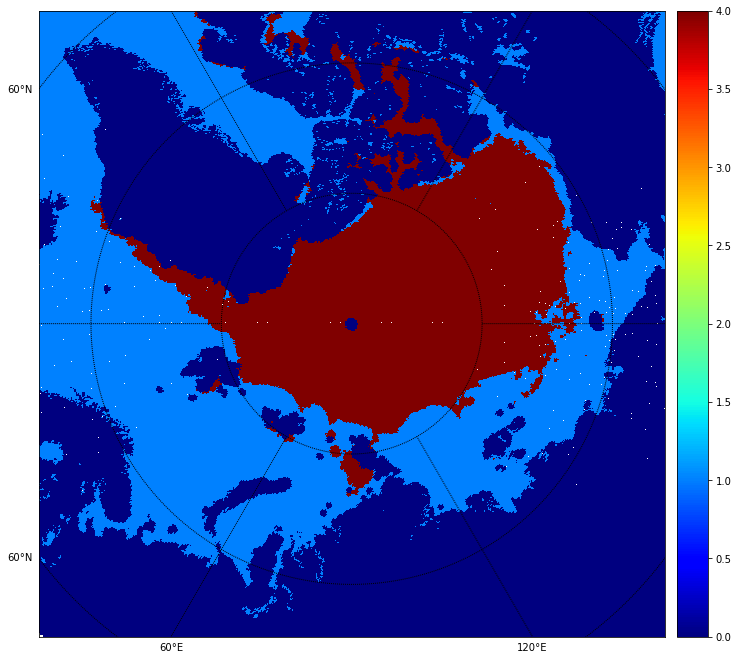

In [41]:
plt.figure(figsize=(12, 12))
hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=90., resolution='c')
hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmax = 4,vmin = 0,latlon = True)
hy_m.colorbar(location='right')
# hy_m.fillcontinents()
# hy_m.drawcoastlines(color='black')
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
plt.show()